<a href="https://colab.research.google.com/github/RitvikReddyKandanelly/DeepLearning/blob/master/Assignemnt1/Ritvik_1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


In [0]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20



In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
 # Reshaping the train and test data
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
 # Converting y variable to categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
 # Adding layers to neural networks
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
# adding the optimization layer
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [0]:
# adding the epochs
epochs = 70
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 3s 64us/step - loss: 1.4251 - acc: 0.5059 - val_loss: 1.6625 - val_acc: 0.4586
Epoch 2/70
50000/50000 [==============================] - 3s 65us/step - loss: 1.4162 - acc: 0.5080 - val_loss: 1.8705 - val_acc: 0.4308
Epoch 3/70
50000/50000 [==============================] - 3s 65us/step - loss: 1.4206 - acc: 0.5045 - val_loss: 1.7237 - val_acc: 0.4514
Epoch 4/70
50000/50000 [==============================] - 3s 65us/step - loss: 1.4201 - acc: 0.5064 - val_loss: 1.7414 - val_acc: 0.4366
Epoch 5/70
50000/50000 [==============================] - 3s 65us/step - loss: 1.4184 - acc: 0.5053 - val_loss: 1.8366 - val_acc: 0.4417
Epoch 6/70
50000/50000 [==============================] - 3s 64us/step - loss: 1.4307 - acc: 0.5006 - val_loss: 1.6660 - val_acc: 0.4361
Epoch 7/70
50000/50000 [==============================] - 3s 64us/step - loss: 1.4274 - acc: 0.5018 - val_loss: 1.7177 - val_acc

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6852296886444091
Test accuracy: 0.4472


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


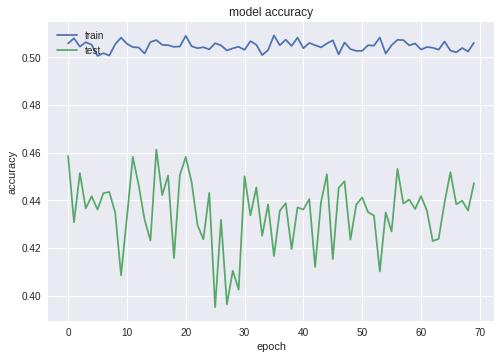

In [0]:
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 2s 41us/step - loss: 1.4197 - acc: 0.4988 - val_loss: 1.9300 - val_acc: 0.3865
Epoch 2/150
50000/50000 [==============================] - 2s 40us/step - loss: 1.3967 - acc: 0.5044 - val_loss: 1.8944 - val_acc: 0.4102
Epoch 3/150
50000/50000 [==============================] - 2s 40us/step - loss: 1.4026 - acc: 0.5034 - val_loss: 2.1689 - val_acc: 0.4006
Epoch 4/150
50000/50000 [==============================] - 2s 40us/step - loss: 1.4046 - acc: 0.5034 - val_loss: 1.8886 - val_acc: 0.4241
Epoch 5/150
50000/50000 [==============================] - 2s 41us/step - loss: 1.4066 - acc: 0.5030 - val_loss: 1.9018 - val_acc: 0.3924
Epoch 6/150
50000/50000 [==============================] - 2s 40us/step - loss: 1.3971 - acc: 0.5024 - val_loss: 1.8938 - val_acc: 0.3922
Epoch 7/150
50000/50000 [==============================] - 2s 40us/step - loss: 1.4126 - acc: 0.4982 - val_loss: 1.8561 - 

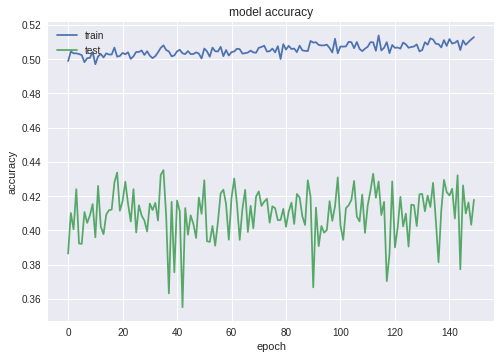

In [0]:


epochs = 150
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.4224 - acc: 0.5034 - val_loss: 2.0366 - val_acc: 0.4031
Epoch 2/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.3978 - acc: 0.5089 - val_loss: 2.1087 - val_acc: 0.4054
Epoch 3/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.4000 - acc: 0.5069 - val_loss: 2.0179 - val_acc: 0.3920
Epoch 4/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.4039 - acc: 0.5091 - val_loss: 1.9985 - val_acc: 0.4008
Epoch 5/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.4093 - acc: 0.5088 - val_loss: 1.9475 - val_acc: 0.4108
Epoch 6/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.3935 - acc: 0.5110 - val_loss: 1.9707 - val_acc: 0.4169
Epoch 7/70
50000/50000 [==============================] - 2s 47us/step - loss: 1.3775 - acc: 0.5088 - val_loss: 1.9293 - val_acc

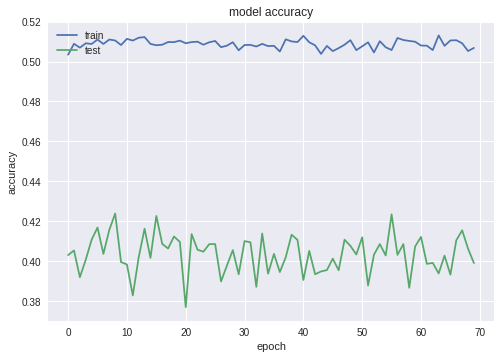

In [0]:
batch_size = 200
epochs = 70
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 103us/step - loss: 1.5516 - acc: 0.4780 - val_loss: 2.3147 - val_acc: 0.3090
Epoch 2/70
50000/50000 [==============================] - 5s 103us/step - loss: 1.5465 - acc: 0.4738 - val_loss: 2.2624 - val_acc: 0.3744
Epoch 3/70
50000/50000 [==============================] - 5s 104us/step - loss: 1.5568 - acc: 0.4768 - val_loss: 2.0151 - val_acc: 0.4031
Epoch 4/70
50000/50000 [==============================] - 5s 103us/step - loss: 1.5777 - acc: 0.4706 - val_loss: 2.1347 - val_acc: 0.3704
Epoch 5/70
50000/50000 [==============================] - 5s 103us/step - loss: 1.5613 - acc: 0.4685 - val_loss: 2.0513 - val_acc: 0.3822
Epoch 6/70
50000/50000 [==============================] - 5s 104us/step - loss: 1.5760 - acc: 0.4697 - val_loss: 2.0587 - val_acc: 0.4046
Epoch 7/70
50000/50000 [==============================] - 5s 104us/step - loss: 1.5574 - acc: 0.4703 - val_loss: 2.0847 - 

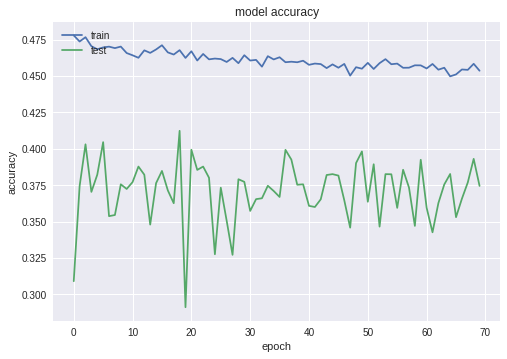

In [0]:
batch_size = 70
epochs = 70
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 66us/step - loss: 1.5223 - acc: 0.4791 - val_loss: 2.1382 - val_acc: 0.3732
Epoch 2/20
50000/50000 [==============================] - 3s 65us/step - loss: 1.5260 - acc: 0.4784 - val_loss: 2.1019 - val_acc: 0.3750
Epoch 3/20
50000/50000 [==============================] - 3s 67us/step - loss: 1.5138 - acc: 0.4799 - val_loss: 1.9900 - val_acc: 0.3923
Epoch 4/20
50000/50000 [==============================] - 3s 66us/step - loss: 1.5034 - acc: 0.4812 - val_loss: 2.0666 - val_acc: 0.3997
Epoch 5/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.5042 - acc: 0.4809 - val_loss: 2.0116 - val_acc: 0.3946
Epoch 6/20
50000/50000 [==============================] - 3s 64us/step - loss: 1.5340 - acc: 0.4765 - val_loss: 1.9897 - val_acc: 0.4110
Epoch 7/20
50000/50000 [==============================] - 3s 65us/step - loss: 1.4942 - acc: 0.4825 - val_loss: 2.1314 - val_acc

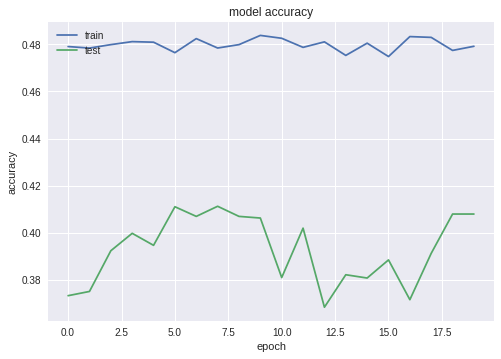

In [0]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5237 - acc: 0.4799 - val_loss: 2.2028 - val_acc: 0.4026
Epoch 2/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5388 - acc: 0.4775 - val_loss: 2.2061 - val_acc: 0.3916
Epoch 3/30
50000/50000 [==============================] - 3s 67us/step - loss: 1.5416 - acc: 0.4748 - val_loss: 2.1965 - val_acc: 0.3826
Epoch 4/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5312 - acc: 0.4801 - val_loss: 2.1751 - val_acc: 0.3962
Epoch 5/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5364 - acc: 0.4747 - val_loss: 2.0650 - val_acc: 0.3447
Epoch 6/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5052 - acc: 0.4806 - val_loss: 2.2150 - val_acc: 0.3891
Epoch 7/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5166 - acc: 0.4771 - val_loss: 2.2540 - val_acc

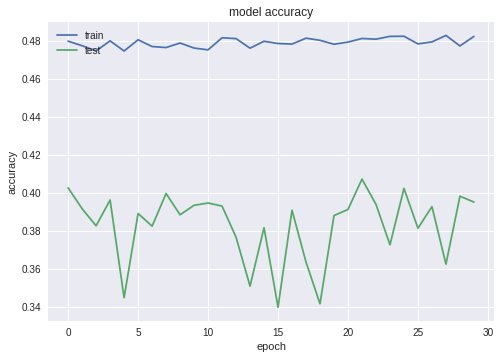

In [0]:
batch_size = 120
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 700)               2151100   
_________________________________________________________________
dropout_3 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 700)               490700    
_________________________________________________________________
dropout_4 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 6s 110us/step - loss: 2.

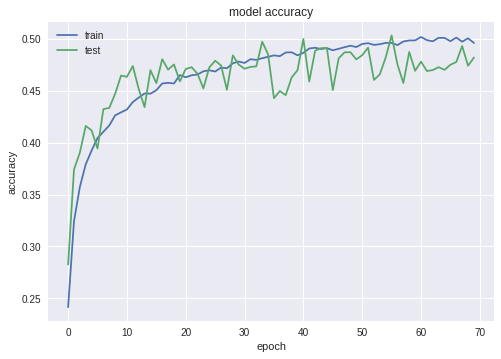

In [0]:
# by increasing number of neurons to 700

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 83us/step - loss: 5.3

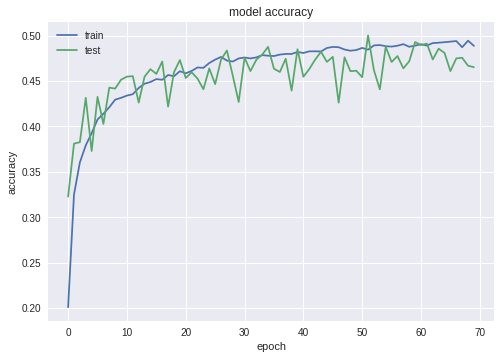

In [0]:
# By increasing number of neurons in the neurons 1000

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_13 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_14 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_15 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 700)               490700    
__________

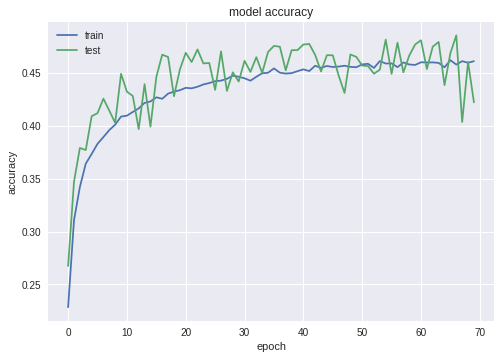

In [0]:
# NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
# hidden layers=3

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_17 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_18 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_19 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                7010      
Total para

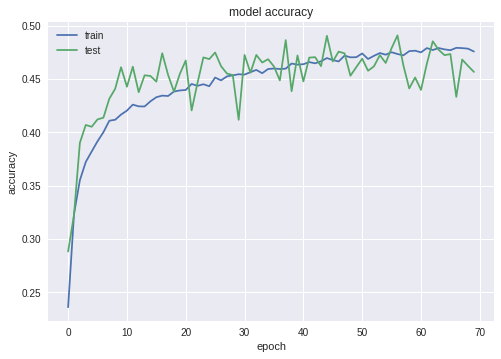

In [0]:
# NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
# hidden layers=3

#trying with 

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_20 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_21 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 83us/step - loss: 14.

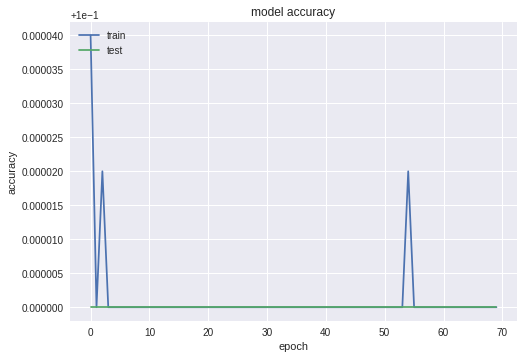

In [0]:
#the best code is # NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
#hidden layers=3
# learning rate =0.1

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_28 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_29 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 85us/step - loss: 14.

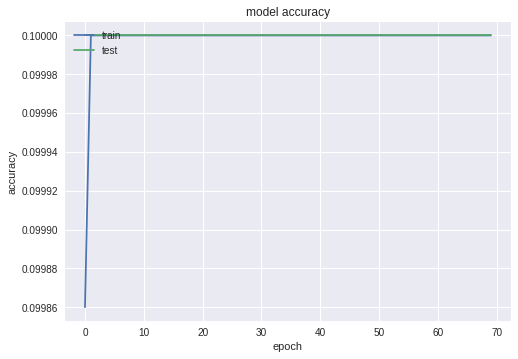

In [0]:
#the best code is # NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
#hidden layers=3
# learning rate =0.01

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_30 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_31 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 81us/step - loss: 2.3

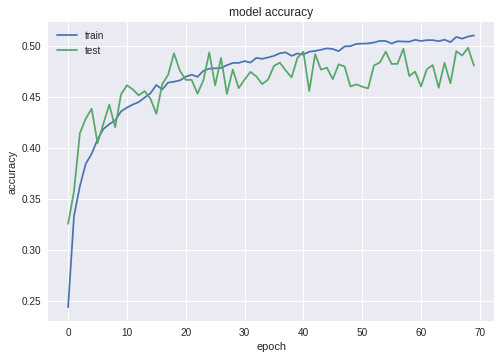

In [0]:
#the best code is # NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
#hidden layers=1
# learning rate =0.001

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_32 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_33 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 82us/step - loss: 1.9

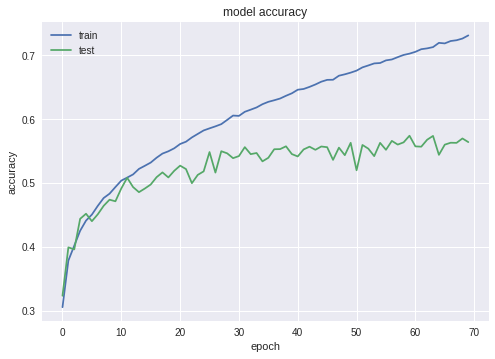

In [0]:
#the best code is # NOW INCREASING NUMBER OF HIDDEN LAYERS BY:
#BATCH_SIZE=128
#Epochs=70
#NEURONS=700
#hidden layers=1
# learning rate =0.0001

batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_34 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_35 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 92us/step - loss: 1.9

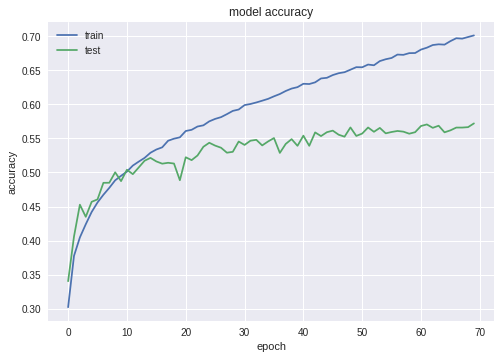

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_42 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_43 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_44 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                7010      
Total para

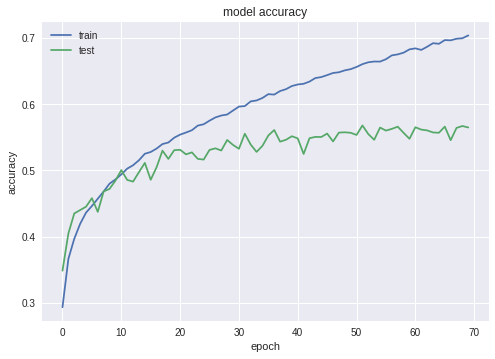

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(700, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_45 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_46 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 89us/step - loss: 1.9

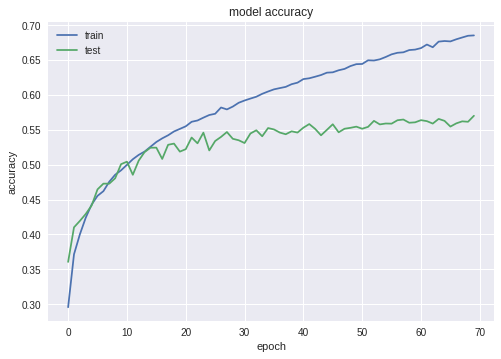

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='selu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_47 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_48 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 97us/step - loss: 1.9

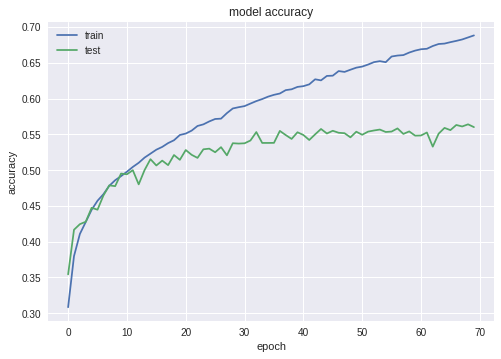

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='softsign', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_49 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_50 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 100us/step - loss: 2.

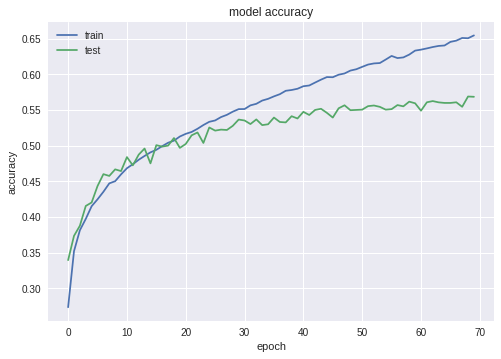

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='hard_sigmoid', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_51 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_52 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 102us/step - loss: 2.

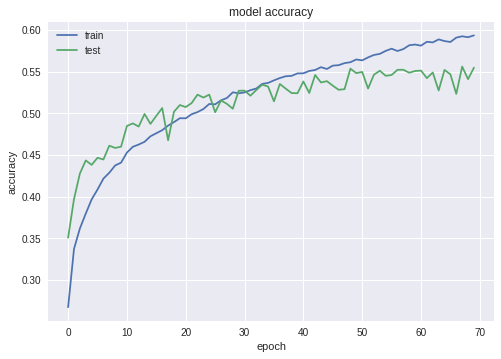

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_53 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_54 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 5s 99us/step - loss: 1.9

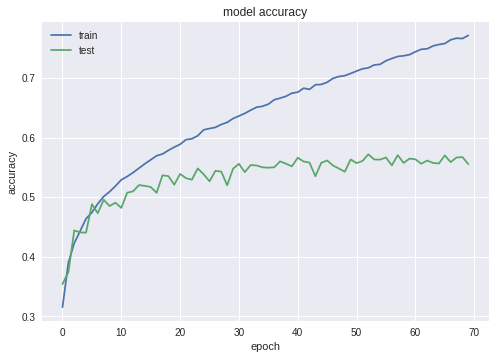

In [0]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()